In [1]:
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv("volumes_v3.csv")

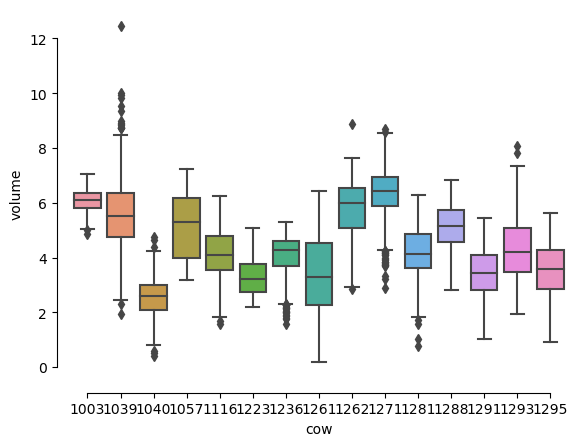

In [6]:
sns.boxplot(x="cow", y="volume",data = df)
sns.despine(offset=10, trim=True)

In [69]:
df2 = pd.melt(df, id_vars = "cow", value_vars = ["volume", "lf_vol", "rf_vol", "lb_vol", "rb_vol"]).reset_index()
grouped = df2[["cow", "variable", "value"]].groupby(["cow", "variable"]).agg(["median", "min","max", "mean"])
grouped.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped.columns]
grouped = grouped.reset_index()

In [75]:
grouped2 = pd.melt(grouped, id_vars = ["cow", "variable"], value_vars = ["value_median", "value_min","value_max", "value_mean"], var_name = "measure")

In [80]:
grouped

,cow,variable,value_median,value_min,value_max,value_mean
0,1003,lb_vol,1.938798,1.319171e+00,2.379446,1.933319
1,1003,lf_vol,0.738506,4.229651e-01,0.953726,0.737253
2,1003,rb_vol,1.379179,9.693664e-01,1.838361,1.386589
3,1003,rf_vol,2.231967,1.929589e+00,2.586444,2.224328
4,1003,volume,6.101061,4.843747e+00,7.062925,6.096982
...,...,...,...,...,...,...
70,1295,lb_vol,1.612309,1.511364e-05,2.881080,1.627872
71,1295,lf_vol,1.026939,1.092964e-02,1.928488,1.010762
72,1295,rb_vol,0.937243,1.080006e-01,3.221801,0.953853
73,1295,rf_vol,0.028099,1.667492e-09,2.052705,0.094428


C:\Users\marie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


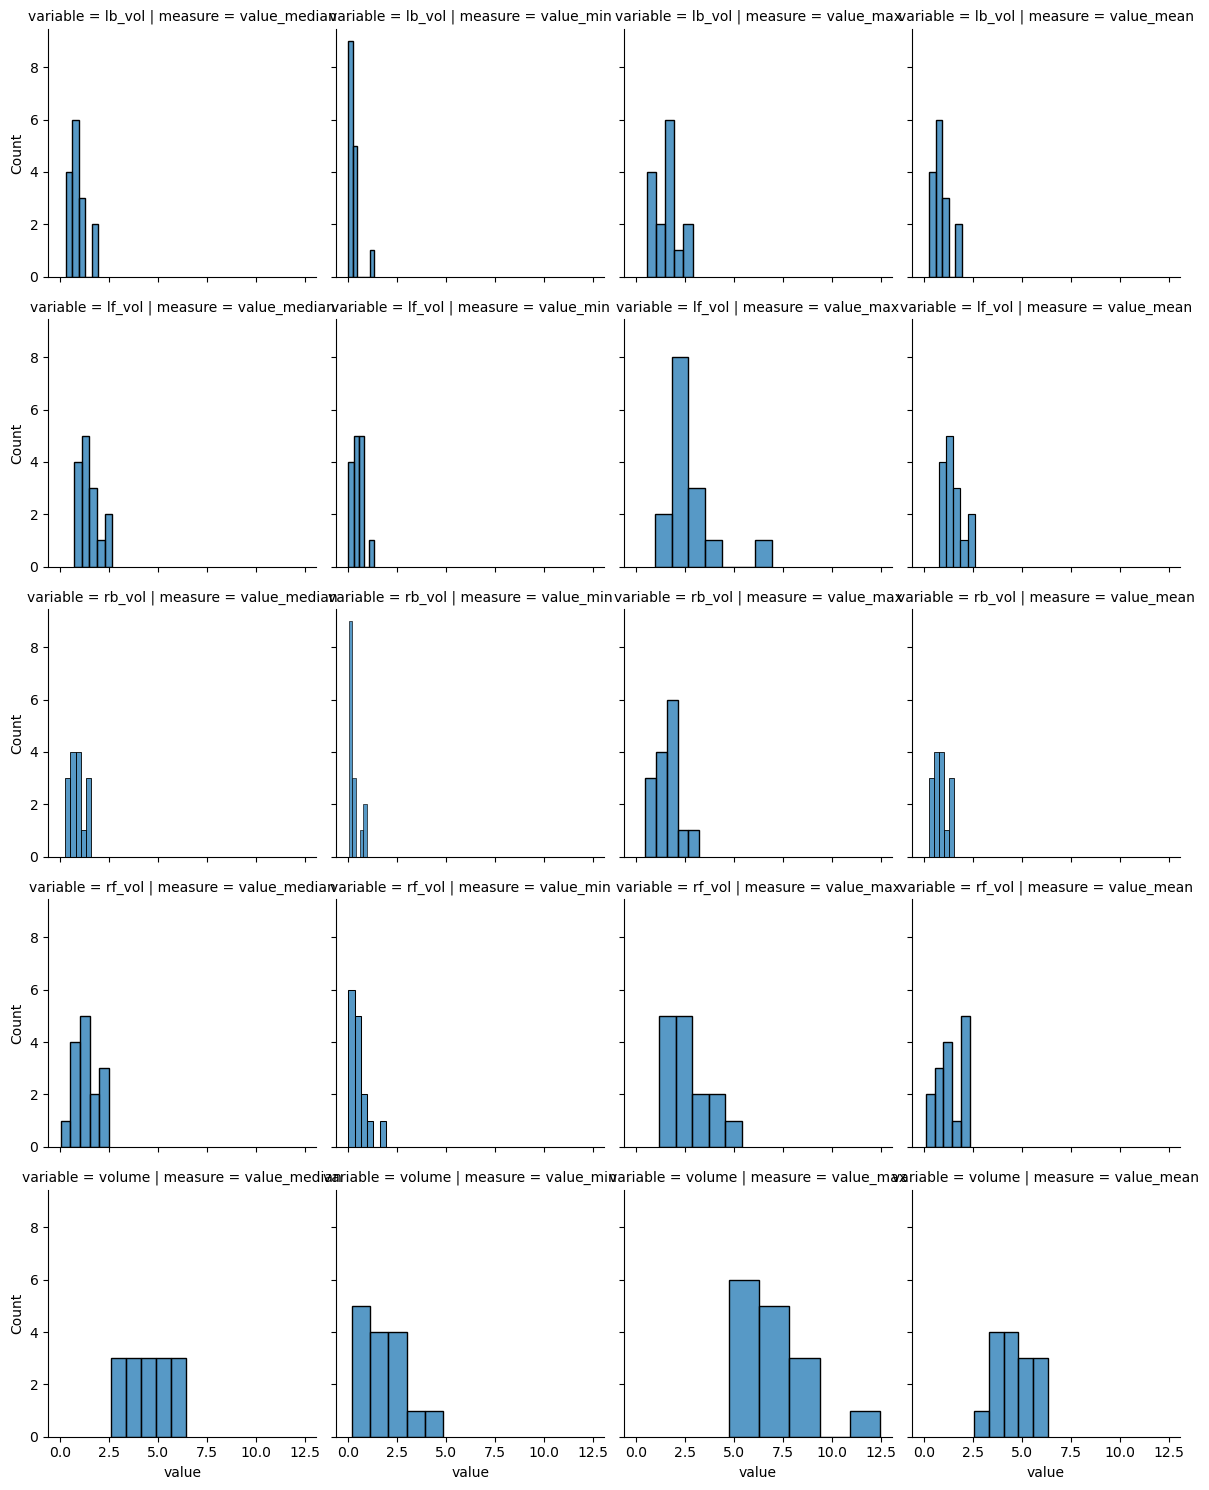

In [78]:
g = sns.FacetGrid(grouped2,row="variable", col = "measure")
g.map_dataframe(sns.histplot, x="value")
